In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn
from pandas.plotting import parallel_coordinates
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
style.use('dark_background')
%matplotlib inline

In [132]:
#binary classification problem
def get_data():
    x_train=pd.read_csv('Logistic_X_Train.csv')
    y_train=pd.read_csv('Logistic_Y_Train.csv')
    x_test=pd.read_csv('Logistic_X_Test.csv')
    xcolumn_names=pd.read_csv('Logistic_X_Train.csv').columns
    ycolumn_names=pd.read_csv('Logistic_Y_Train.csv').columns
    training_data=pd.read_csv('Logistic_X_Train.csv')
    training_data[y_train.columns[0]]=y_train
    return x_train.values,y_train.values,x_test.values,list(xcolumn_names),list(ycolumn_names),training_data,x_test

In [133]:
#for pairwise scatter plots
def plot_data_scatter(x,y,title,x_label,y_label):
    plt.figure(0)
    plt.scatter(x,y,color='orange')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    #plt.legend()
    plt.show()

In [134]:
#for visualizing in pairwise correlation matrix
def plot_data_heatmap(training_data):
    seaborn.heatmap(training_data.corr(),annot=True,cmap='coolwarm')
    plt.title("Chemical Features Pairwise correlation matrix")
    plt.show()

In [135]:
def plot_data_parallel_coordinates(data_frame):
    plt.title("Parallel Coordinates Plot:")
    Label=data_frame.columns[-1]
    parallel_coordinates(data_frame,class_column=Label,color=('#FFE888','#4ECDC4'))
    plt.show()

In [136]:
def logistic_regression(x_train,y_train,x_test):
    model=train_model(x_train,y_train,x_test)
    y_pred=predict_yval(model,x_test)
    #conf_matrix=confusion_metrics() you need ytest for this
    weight=model.intercept_
    bias=model.coef_
    return y_pred,weight,bias

In [137]:
#confusion matrix: describe the performance of a classificaion model

In [138]:
def train_model(x_train,y_train,x_test):
    model=LogisticRegression() # creating instace of the model
    model.fit(x_train,y_train)
    return model

In [139]:
def predict_yval(model,x_test):
    y_pred=model.predict(x_test)
    return y_pred

In [140]:
def main():
    x_train,y_train,x_test,xcolumn_names,ycolumn_names,training_data,testing_data=get_data()
    
    print("                PLOT FOR TRAINING DATA :")
    plot_data_parallel_coordinates(training_data)
    plot_data_heatmap(training_data)
    for i in range(x_train.shape[1]):
        plot_data_scatter(x_train[:,i],y_train[:,0],"  Chemical Features Pairwise Plots",xcolumn_names[i],ycolumn_names[0])
    
    print("               PLOT FOR TESTING DATA :")
    y_pred,weight,bias=logistic_regression(x_train,y_train,x_test)
    testing_data['Y_Pred']=y_pred
    plot_data_parallel_coordinates(testing_data)
    plot_data_heatmap(testing_data)
    ycolumn_names=testing_data.columns[-1]
    
    for i in range(x_test.shape[1]):
        plot_data_scatter(x_test[:,i],y_pred,"  Chemical Features Pairwise Plots",xcolumn_names[i],ycolumn_names[0])

    return testing_data

                PLOT FOR TRAINING DATA :


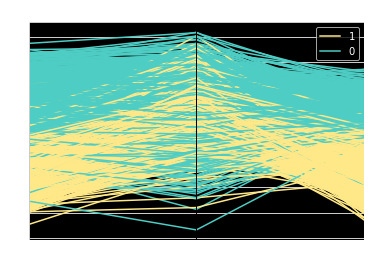

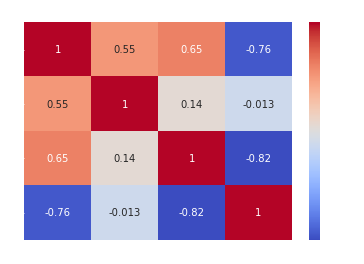

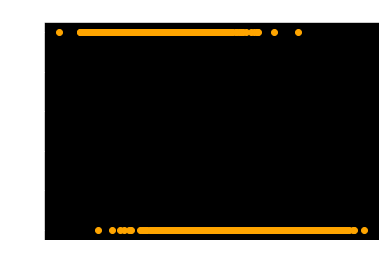

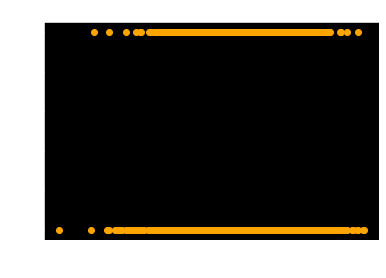

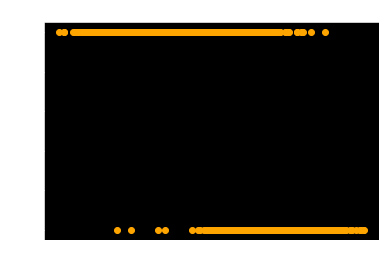

               PLOT FOR TESTING DATA :


/home/mishadey/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


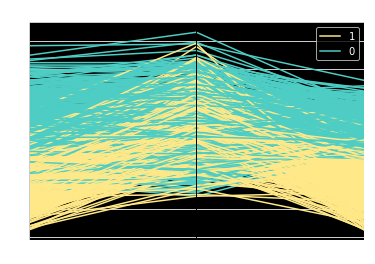

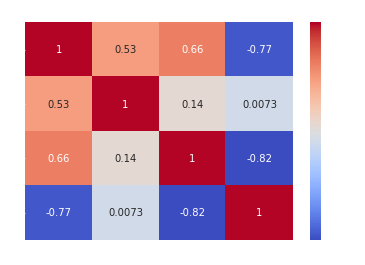

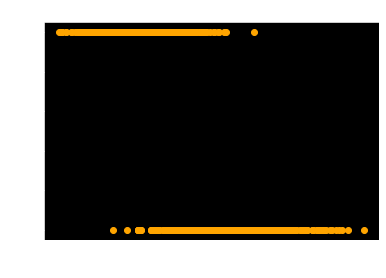

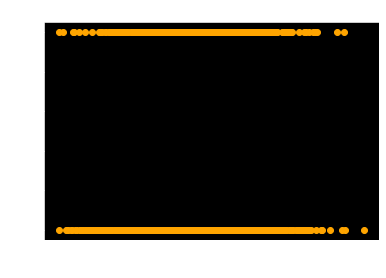

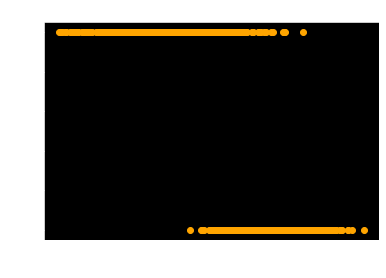

In [141]:
if __name__ =='__main__':
    testing_data=main()